In [1]:
import os

os.chdir("/mast3r")
print(os.getcwd())

from mast3r.model import AsymmetricMASt3R
from mast3r.cloud_opt.sparse_ga import sparse_global_alignment
from mast3r.demo import SparseGAState, get_3D_model_from_scene

import mast3r.utils.path_to_dust3r
from dust3r.inference import inference
from dust3r.utils.image import load_images
from dust3r.image_pairs import make_pairs

device = 'cuda'
schedule = 'cosine'
lr = 0.01
niter = 300

#DATA_PATH = "/scratchdata/nerf_estimator/blender/test/jackal_training_data_0"
DATA_PATH = "/scratchdata/SampleSet/MVS Data/Cleaned/scan6"
MODEL_NAME = "/scratchdata/MASt3R_ViTLarge_BaseDecoder_512_catmlpdpt_metric.pth"
model = AsymmetricMASt3R.from_pretrained(MODEL_NAME).to(device)

/mast3r
Warning, cannot find cuda-compiled version of RoPE2D, using a slow pytorch version instead


/mast3r/dust3r/dust3r/cloud_opt/base_opt.py:275: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  @torch.cuda.amp.autocast(enabled=False)


... loading model from /scratchdata/MASt3R_ViTLarge_BaseDecoder_512_catmlpdpt_metric.pth


/mast3r/mast3r/model.py:24: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load(model_path, map_location='cpu')


instantiating : AsymmetricMASt3R(enc_depth=24, dec_depth=12, enc_embed_dim=1024, dec_embed_dim=768, enc_num_heads=16, dec_num_heads=12, pos_embed='RoPE100',img_size=(512, 512), head_type='catmlp+dpt', output_mode='pts3d+desc24', depth_mode=('exp', -inf, inf), conf_mode=('exp', 1, inf), patch_embed_cls='PatchEmbedDust3R', two_confs=True, desc_conf_mode=('exp', 0, inf), landscape_only=False)
<All keys matched successfully>


In [2]:
image_array = []

for i in range(0,40,10):
    #image_array.append(os.path.join(DATA_PATH, "images", f"{i}.png"))
    image_array.append(os.path.join(DATA_PATH, f"clean_{i+1:0{3}d}_5_r5000.png"))

images = load_images(image_array, size=512)
pairs = make_pairs(images, scene_graph='swin-3', prefilter=None, symmetrize=True)
#output = inference(pairs, model, device, batch_size=1, verbose=True)

>> Loading a list of 4 images
 - adding /scratchdata/SampleSet/MVS Data/Cleaned/scan6/clean_001_5_r5000.png with resolution 1600x1200 --> 512x384
 - adding /scratchdata/SampleSet/MVS Data/Cleaned/scan6/clean_011_5_r5000.png with resolution 1600x1200 --> 512x384
 - adding /scratchdata/SampleSet/MVS Data/Cleaned/scan6/clean_021_5_r5000.png with resolution 1600x1200 --> 512x384
 - adding /scratchdata/SampleSet/MVS Data/Cleaned/scan6/clean_031_5_r5000.png with resolution 1600x1200 --> 512x384
 (Found 4 images)


In [3]:
lr1 = 0.07
lr2 = 0.014
niter1 = 500
niter2 = niter  
shared_intrinsics = True
matching_conf_thr = 200
optim_level = 'course'

scene = sparse_global_alignment(image_array, pairs, "/tmp",
                                model, lr1=lr1, niter1=niter1, lr2=lr2, niter2=niter2, device=device,
                                opt_depth='depth' in optim_level, shared_intrinsics=shared_intrinsics,
                                matching_conf_thr=matching_conf_thr, verbose=True)


  0%|          | 0/4 [00:00<?, ?it/s]/mast3r/mast3r/cloud_opt/sparse_ga.py:646: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  (canon, canon2, cconf), focal = torch.load(cach

init focal (shared) =  712.97


100%|██████████| 300/300 [00:02<00:00, 117.58it/s, lr=0.0000, loss=0.045]


>> final loss = 0.04511381313204765


100%|██████████| 300/300 [00:03<00:00, 95.76it/s, lr=0.0000, loss=1.012] 


>> final loss = 1.01236891746521
Final focal (shared) =  865.42


In [4]:
min_conf_thr = 1.5
as_pointcloud = True
mask_sky = False
clean_depth = True
transparent_cams = False
cam_size = 0.05
TSDF_thresh = 0

scene_state = SparseGAState(scene, True, "cache_dir", "test.glb")
outfile = get_3D_model_from_scene(True, scene_state, min_conf_thr, as_pointcloud, mask_sky,
                                    clean_depth, transparent_cams, cam_size, TSDF_thresh)

/mast3r/mast3r/cloud_opt/sparse_ga.py:77: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  (canon, canon2, conf), focal = torch.load(canon_path, map_location=device)


In [5]:
imgs = scene.imgs
focals = scene.get_focals()
poses = scene.get_im_poses()

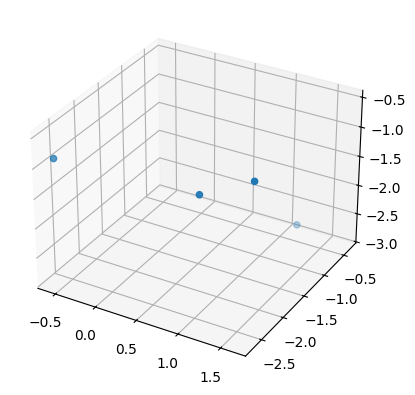

In [6]:
#3D scatter plot
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

poses_cpu = poses.cpu().numpy()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(poses_cpu[:, 0, 3], poses_cpu[:, 1, 3], poses_cpu[:, 2, 3])

plt.show()

In [7]:
print(output["view1"].keys())
print(output["pred1"].keys())

print(output["pred1"]["pts3d"].shape)

NameError: name 'output' is not defined

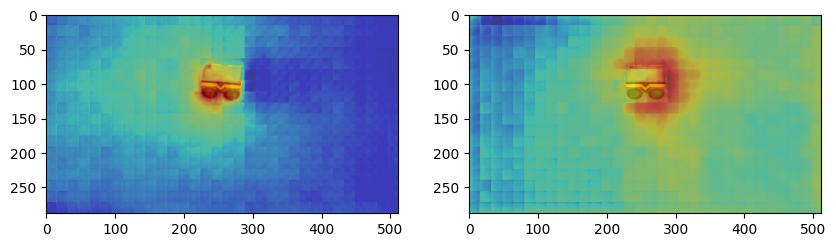

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

img1 = output["view1"]["img"][0].cpu().numpy().transpose(1, 2, 0)
img1 = (img1 - img1.min()) / (img1.max() - img1.min())
img2 = output["view2"]["img"][0].cpu().numpy().transpose(1, 2, 0)
img2 = (img2 - img2.min()) / (img2.max() - img2.min())

conf1 = output["pred1"]["desc_conf"][0].cpu().numpy()
conf1 = np.log(conf1)
conf2 = output["pred2"]["desc_conf"][0].cpu().numpy()
conf2 = np.log(conf2)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(img1)
axes[0].imshow(conf1, alpha=0.5, cmap="jet")

axes[1].imshow(img2)
axes[1].imshow(conf2, alpha=0.5, cmap="jet")